<a href="https://colab.research.google.com/github/NadavToledo1/Project-Code/blob/main/ML_EX1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ex1 - Unsupervised learning**

## Names and IDs

1.   Nadav Toledo - 209496009
2.   Ido Villa - 208613539

**Introduction**

In this assignment, we will focus on the practical application of unsupervised learning methods, specifically K-means clustering and Principal Component Analysis (PCA). The primary objective is to deepen your understanding of these algorithms and develop proficiency in their implementation using Python and relevant libraries.

**Learning Objectives:**
1.   **Load Local Files**: Implement techniques for
     loading datasets from a local file system into Python.
3.   **Data Visualization**: Apply various visualization techniques to interpret and present your data analysis findings effectively.
4.   **Use Scikit-learn for K-means Clustering**: Use the Scikit-learn library to apply the K-means clustering algorithm.
5.   **Implement Scikit-learn PCA**: Utilize PCA from Scikit-learn to perform dimensionality reduction, a critical technique for analyzing high-dimensional data.
6.   **Algoritmic Understendig**: Solve the calculation problem whle using the algorithms learned in class.








**Important Guidelines:**

**Thoroughly Read the Task Before Implementation:** Ensure to understand the entire assignment and its requirements before beginning to code. A comprehensive understanding will aid in a more structured and efficient approach to the tasks.

**Code Reusability and Function Writing:** Focus on writing reusable code and functions. This practice is crucial for maintaining an organized, efficient, and easily debuggable codebase.





















This assignment is designed to enhance both your theoretical understanding and practical skills in key areas of machine learning. Approach each task with diligence and attention to detail.

## Import All Packages
Add all imports needed for this notebook to run

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np
from sklearn.decomposition import PCA

## 1. Visualization (15 points)
In this section, your task is to create and analyze **three** insightful visualizations based on the customer segmentation dataset. The purpose of these visualizations is to uncover underlying patterns and trends in the data that can inform strategic decisions. Your ability to interpret these visualizations will be key in understanding customer behaviors and preferences.

*   You will get 4 points for the graph and 1 for the insight.



In [5]:
# load the data
file_path = '/content/customer_segmentation.csv'

# Load the data into a DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to check the data
print(data.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

<ipython-input-6-27d41472a1e8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Income', y='Education', data=income_education, palette='viridis')


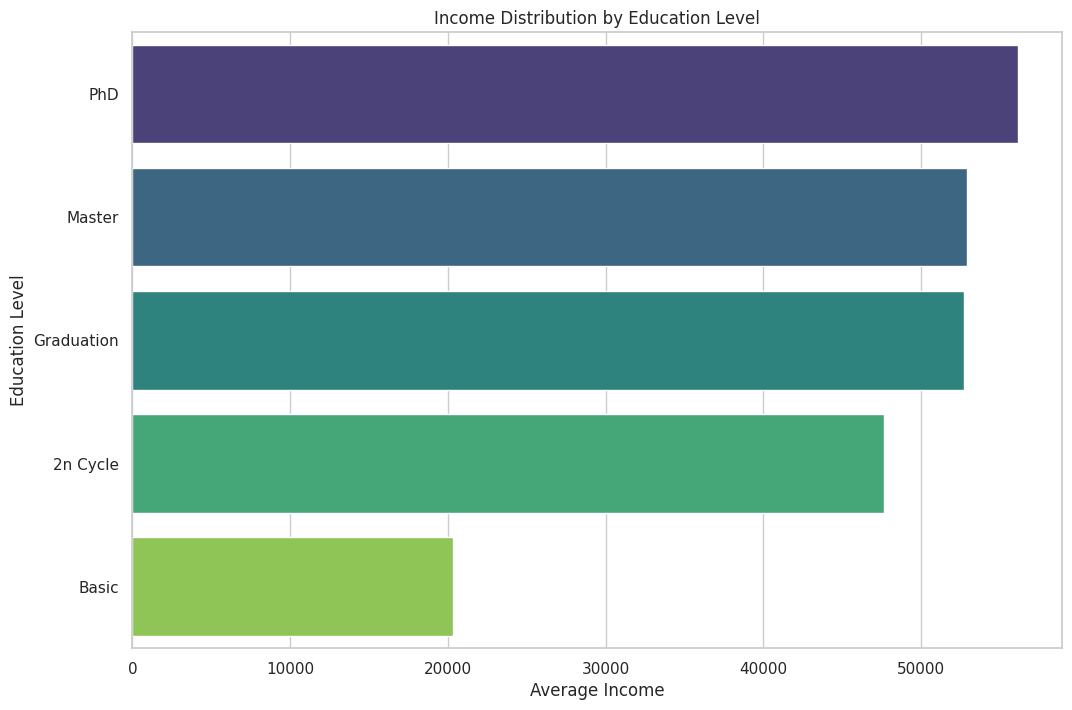

In [6]:
# Graph 1 -
"""A grouped bar chart displaying the average income for each education level."""
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
income_education = data.groupby('Education')['Income'].mean().sort_values(ascending=False).reset_index()
sns.barplot(x='Income', y='Education', data=income_education, palette='viridis')
plt.title('Income Distribution by Education Level')
plt.xlabel('Average Income')
plt.ylabel('Education Level')
plt.show()



**Insight** -
This visualization helps understand the relationship between education level and income. It can provide insights into whether customers with higher education levels tend to have higher incomes.

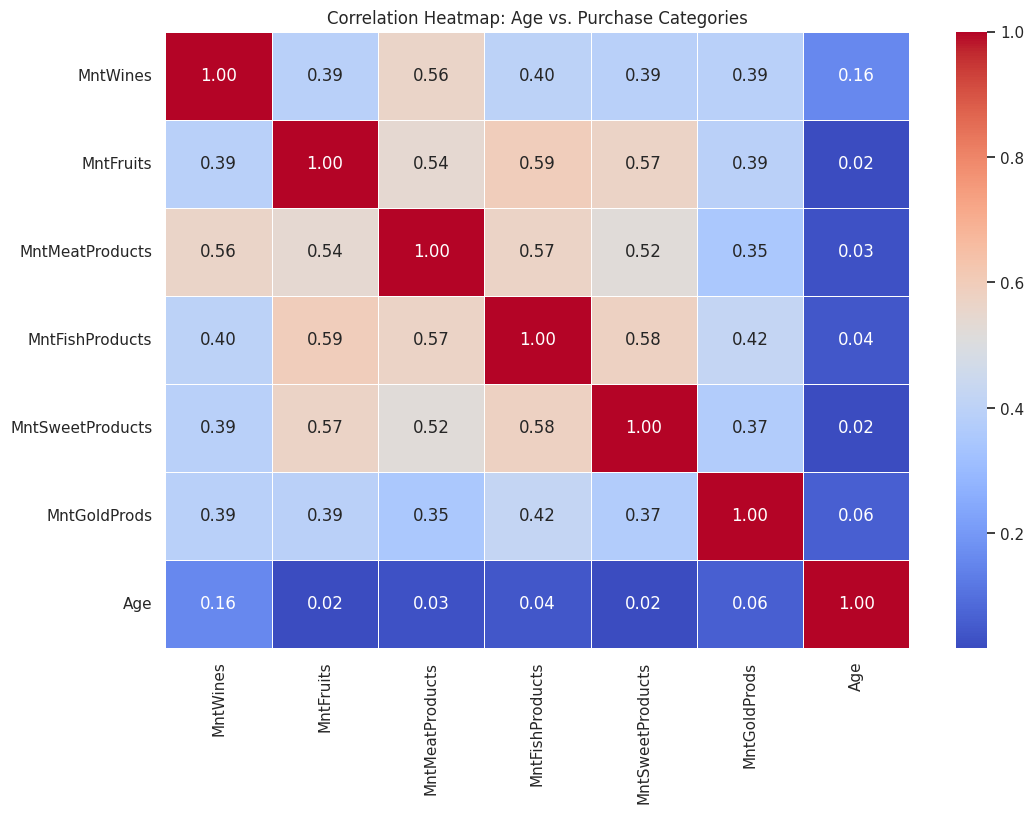

In [7]:
# Graph 2 -
"""
A heatmap showing the correlation matrix between customer age and the number of purchases in various categories.
"""
# Calculate age from the 'Year_Birth' column
data['Age'] = 2024 - data['Year_Birth']

# Select relevant columns for correlation analysis
purchase_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Age']
correlation_matrix = data[purchase_columns].corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap: Age vs. Purchase Categories')
plt.show()


**Insight** -
This heatmap provides a visual representation of the correlation between customer age and the number of purchases in different categories.

<ipython-input-8-a972a53500a6>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
<ipython-input-8-a972a53500a6>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  campaigns_over_time = data.groupby('Dt_Customer')['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'].sum().cumsum()


<Figure size 1200x800 with 0 Axes>

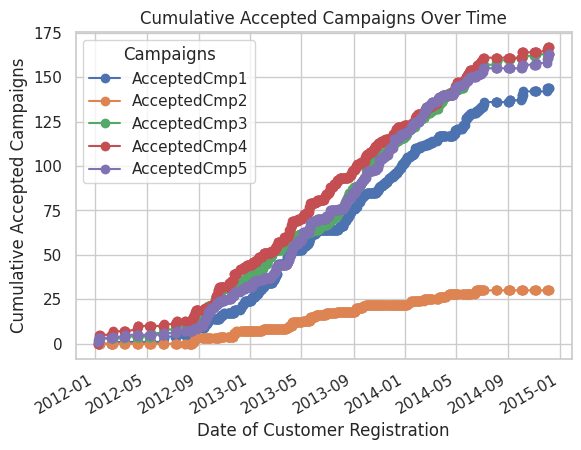

In [8]:
# Graph 3 -
"""A line chart showing the cumulative count of accepted campaigns over time."""
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
campaigns_over_time = data.groupby('Dt_Customer')['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'].sum().cumsum()
plt.figure(figsize=(12, 8))
campaigns_over_time.plot(marker='o')
plt.title('Cumulative Accepted Campaigns Over Time')
plt.xlabel('Date of Customer Registration')
plt.ylabel('Cumulative Accepted Campaigns')
plt.legend(title='Campaigns', loc='upper left')
plt.show()



**Insight** -
This line chart illustrates how the cumulative count of accepted campaigns has evolved over time since customer registration.
It provides insights into the overall effectiveness of marketing campaigns and helps identify periods of increased or decreased campaign success.

## 2. KMEANS (35 points)

In this exercise, you will implement K-means clustering on a comprehensive customer dataset, to identify distinct customer segments.

*   Load the data again.
*   Scale the data using minmax scaler (2 points).
*   Encode categorical variables (3 points).
*   Apply k-Means algorithm on the 'MntMeatProducts' and 'MntWines' features using n_clusters=5
 (10 points).
*   Visualize the clusters (5 points).
*   Apply k-Means algorithm on all features and find the best k using 2 methods (10 points).
*   Visualize the methods (5 points).










In [9]:
# load the data
file_path = '/content/customer_segmentation.csv'

# Load the data into a DataFrame
data = pd.read_csv(file_path)

In [10]:

# Specify columns to drop for clustering
columns_to_drop = ['ID','Dt_Customer']

# Drop specified columns
data_clustering = data.drop(columns_to_drop, axis=1)

# Encode categorical variables
# using Label Encoding
label_encoder = LabelEncoder()
categorical_columns = ['Education', 'Marital_Status']
for col in categorical_columns:
    data_clustering[col] = label_encoder.fit_transform(data_clustering[col])

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_clustering)
# Convert the scaled data back to a DataFrame
data_scaled_df = pd.DataFrame(data_scaled, columns=data_clustering.columns)

print(data_scaled_df.head())

   Year_Birth  Education  Marital_Status    Income  Kidhome  Teenhome  \
0    0.621359        0.5        0.571429  0.084832      0.0       0.0   
1    0.592233        0.5        0.571429  0.067095      0.5       0.5   
2    0.699029        0.5        0.714286  0.105097      0.0       0.0   
3    0.883495        0.5        0.714286  0.037471      0.5       0.0   
4    0.854369        1.0        0.428571  0.085065      0.5       0.0   

    Recency  MntWines  MntFruits  MntMeatProducts  ...  NumWebVisitsMonth  \
0  0.585859  0.425318   0.442211         0.316522  ...               0.35   
1  0.383838  0.007368   0.005025         0.003478  ...               0.25   
2  0.262626  0.285332   0.246231         0.073623  ...               0.20   
3  0.262626  0.007368   0.020101         0.011594  ...               0.30   
4  0.949495  0.115874   0.216080         0.068406  ...               0.25   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0           0.0        

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-11-7bcde8a0cffb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['Cluster'] = kmeans_model.fit_predict(data_selected)


      MntWines  MntMeatProducts  Cluster
0     0.425318         0.316522        3
1     0.007368         0.003478        0
2     0.285332         0.073623        2
3     0.007368         0.011594        0
4     0.115874         0.068406        2
...        ...              ...      ...
2235  0.474883         0.105507        1
2236  0.271936         0.017391        2
2237  0.608171         0.125797        4
2238  0.286671         0.124058        2
2239  0.056263         0.035362        0

[2240 rows x 3 columns]


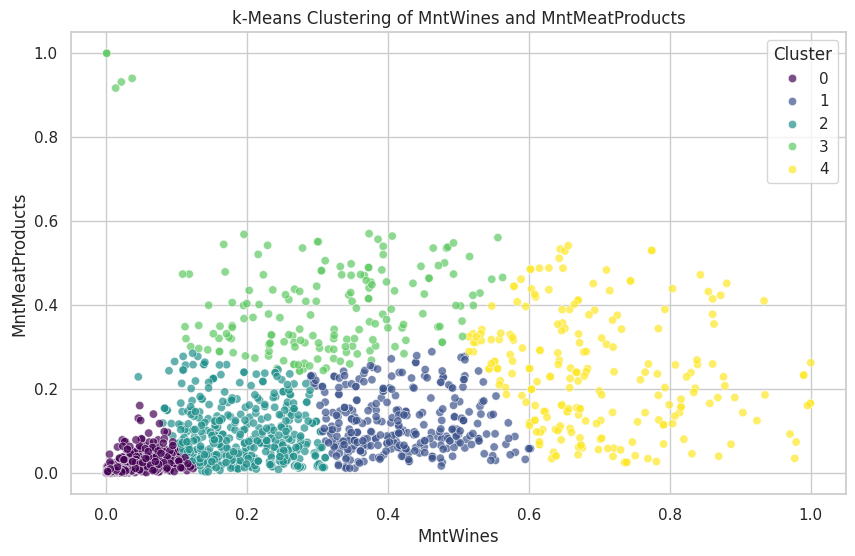

In [11]:
# Apply k-Means on the 'MntWines' and 'MntMeatProducts' features with n_clusters=5

# Extract relevant features
selected_features = ['MntWines', 'MntMeatProducts']
data_selected = data_scaled_df[selected_features]

# Apply K-means clustering
kmeans_model = KMeans(n_clusters=5, random_state=42)
data_selected['Cluster'] = kmeans_model.fit_predict(data_selected)

# Display the cluster assignments
print(data_selected[['MntWines', 'MntMeatProducts', 'Cluster']])

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MntWines', y='MntMeatProducts', hue='Cluster', data=data_selected, palette='viridis', alpha=0.7)
plt.title('k-Means Clustering of MntWines and MntMeatProducts')
plt.xlabel('MntWines')
plt.ylabel('MntMeatProducts')
plt.show()


### Elbow

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

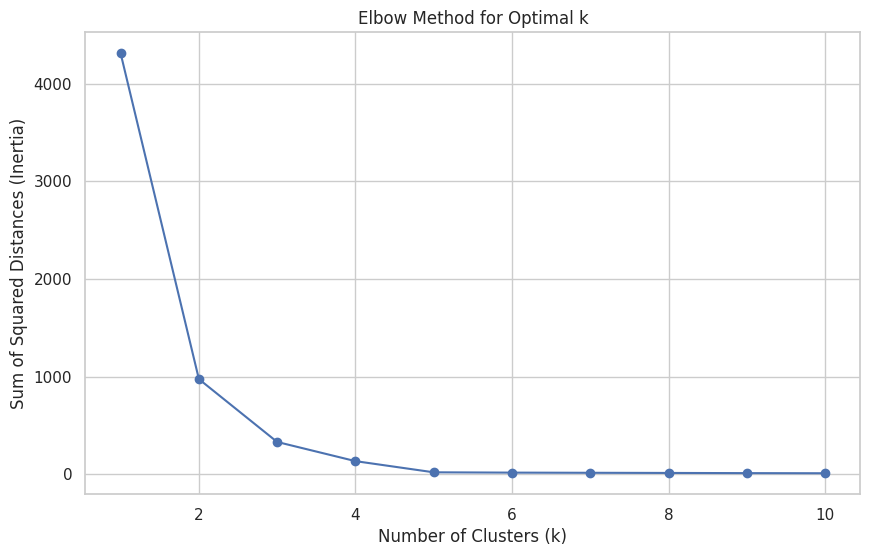

In [12]:
# Determine the optimal number of clusters using the Elbow method
sse = []
possible_k_values = range(1, 11)

for k in possible_k_values:
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(data_selected)
    sse.append(kmeans_model.inertia_)

# Plot the Elbow method
plt.figure(figsize=(10, 6))
plt.plot(possible_k_values, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.show()


### Silhouette Score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


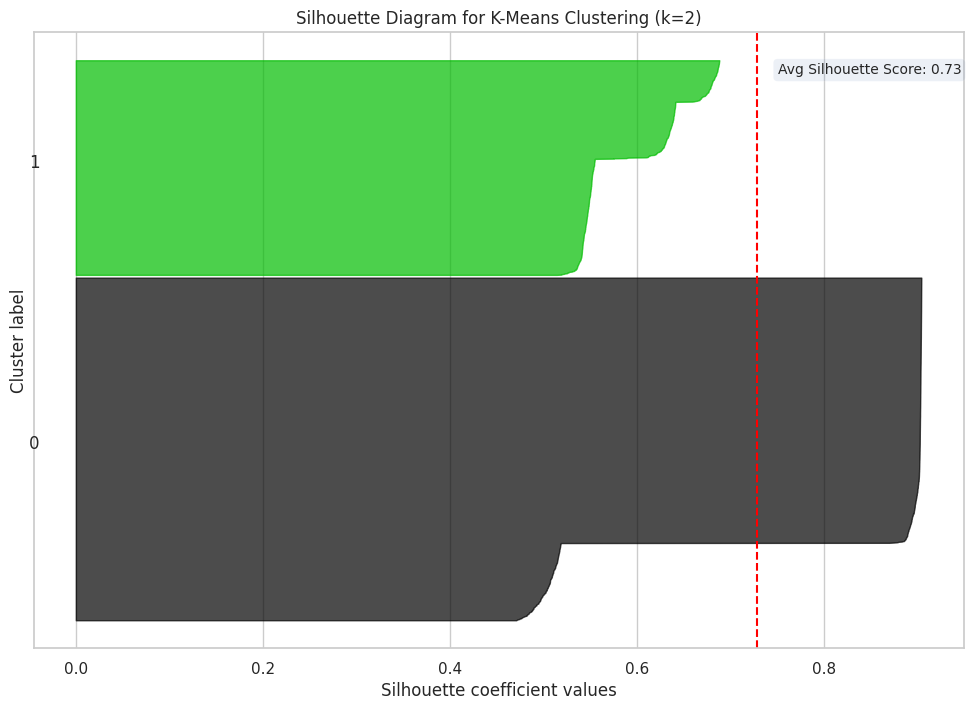

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


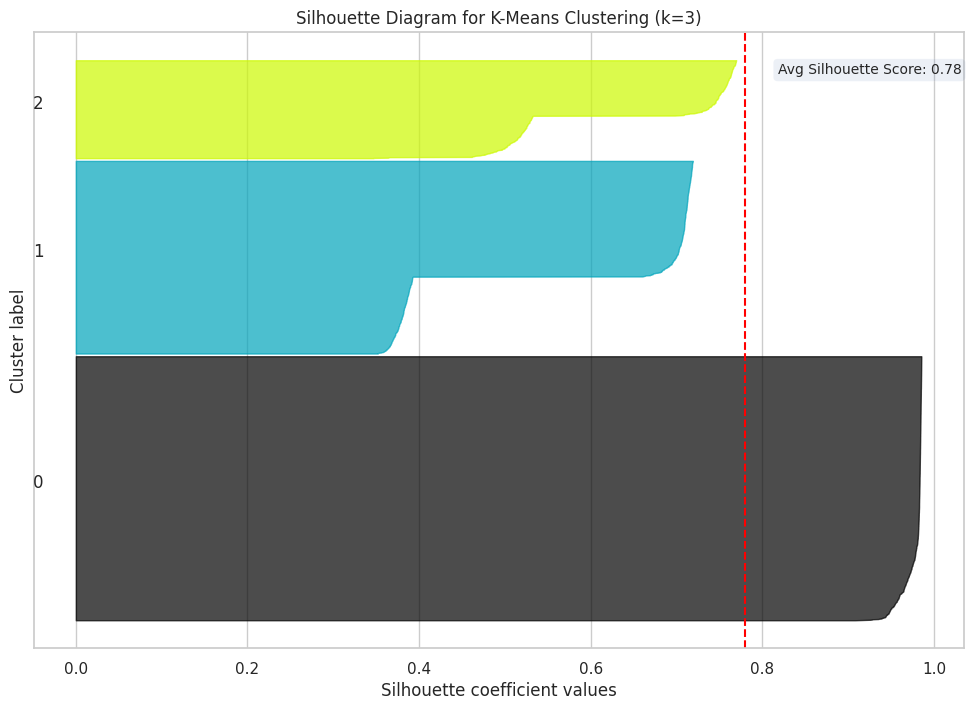

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


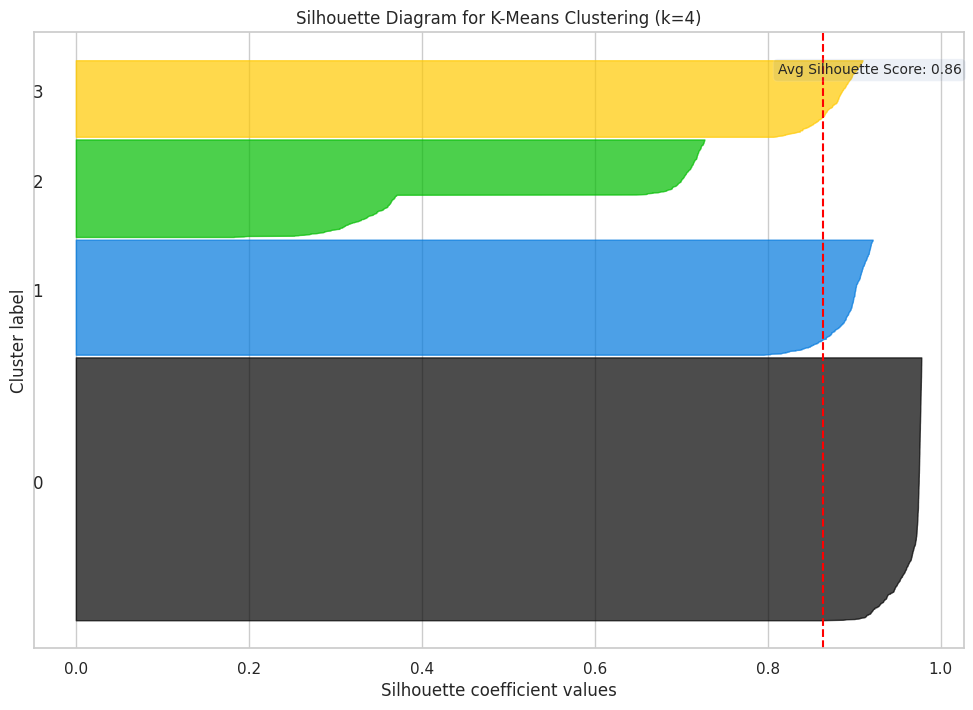

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


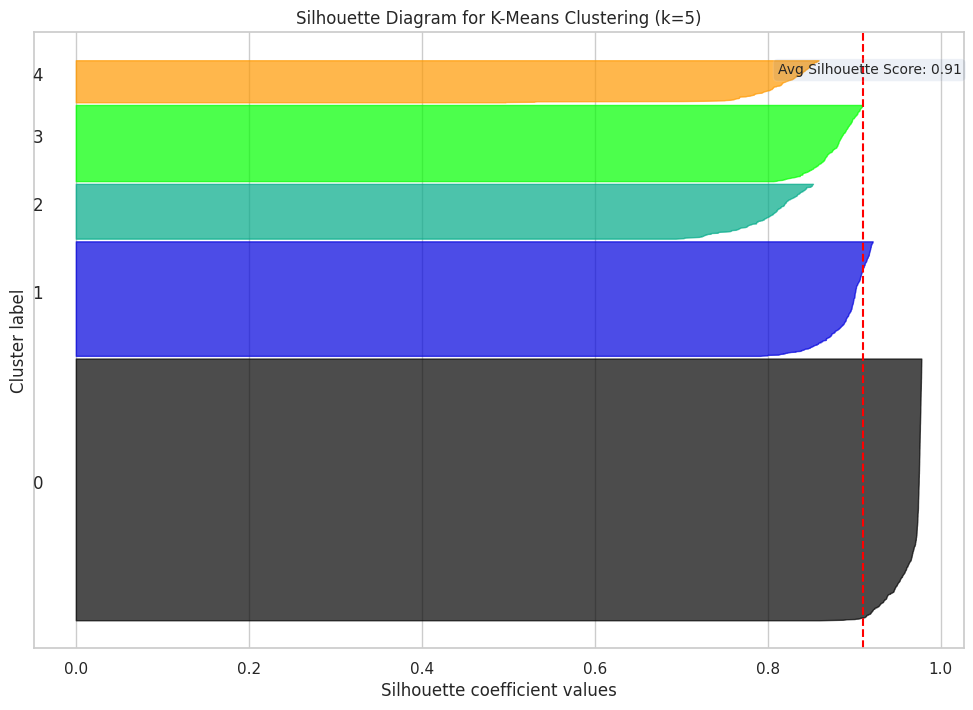

In [13]:
# Specify the range of clusters
range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Apply K-means clustering
    kmeans_model = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans_model.fit_predict(data_selected)

    # Calculate silhouette score for each sample
    silhouette_values = silhouette_samples(data_selected, cluster_labels)

    # Calculate the overall silhouette score
    avg_silhouette_score = silhouette_score(data_selected, cluster_labels)

    # Plot Silhouette Diagram
    plt.figure(figsize=(12, 8))
    y_lower = 10  # Starting point for the first cluster

    for i in range(n_clusters):
        ith_cluster_silhouette_values = silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("Silhouette Diagram for K-Means Clustering (k={})".format(n_clusters))
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")
    plt.axvline(x=avg_silhouette_score, color="red", linestyle="--")

    # Add average silhouette score to the plot
    plt.text(0.8, 0.95, "Avg Silhouette Score: {:.2f}".format(avg_silhouette_score),
             transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round", alpha=0.1))

    plt.yticks([])  # Clear the y-axis labels
    plt.show()

## 3. PCA (15 points)
In this exercise, you will implement PCA:
*   With n_components = 2 (5 points).
*   Visualize the PCA (5 points).
*   Find the variance explined in this PCA (5 points).





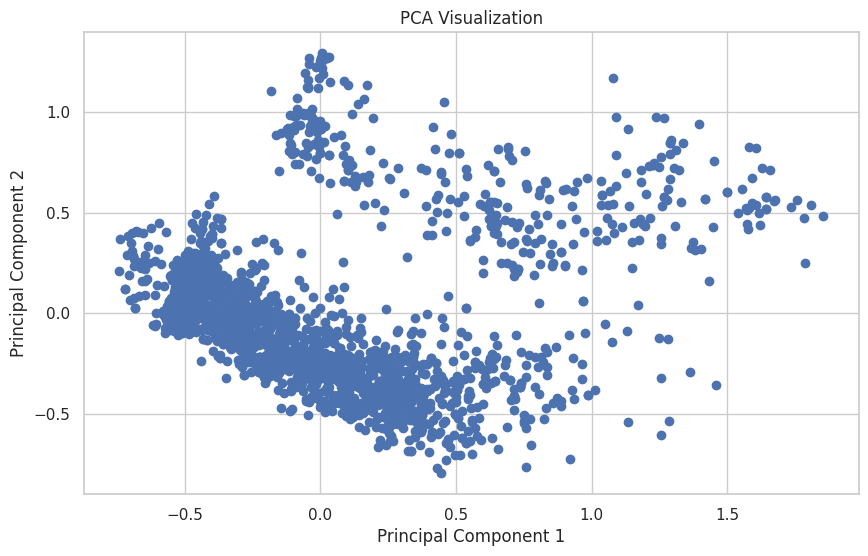

Explained Variance Ratio:
Principal Component 1: 22.92%
Principal Component 2: 13.27%


In [14]:
# drop rows with missing values
data_scaled_df = data_scaled_df.dropna()
# Adjust n_components as needed
# Apply PCA with n_components=2
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled_df)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Plotting the PCA
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'])
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Display explained variance
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:")
print("Principal Component 1: {:.2f}%".format(explained_variance_ratio[0] * 100))
print("Principal Component 2: {:.2f}%".format(explained_variance_ratio[1] * 100))



**Q**: What is the variance explained in the 2 component PCA?

**A**:
the two principal components together capture about 36.19% of the total variance in the data.

## 4. PCA & Kmeans (20 points)
This time, we will use the PCA data for the kmeans model.
*   Run PCA with n_components = 2 (5 points)
*   Find the best k for kmeans (5 points)
*   Plot the best clusters (5 points)
*   Answer the question (5 points)





/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


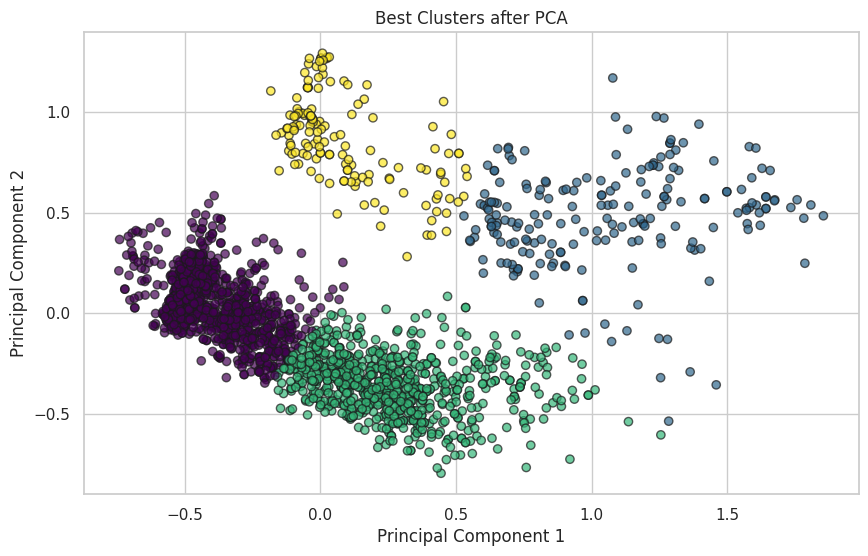

In [15]:
# Apply PCA with n_components=2
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_scaled_df)

# Choose the optimal k based on the Elbow Method
optimal_k = 4

# Fit k-means with the optimal k
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans_model.fit_predict(pca_data)

# Plot the best clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels, cmap='viridis', edgecolors='k', alpha=0.7)
plt.title('Best Clusters after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### Elbow

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

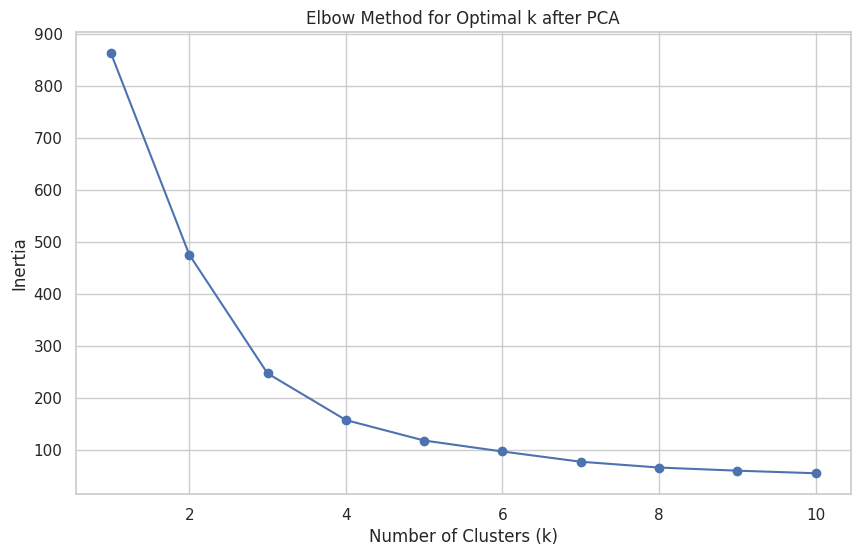

In [16]:
# Find the best k using the Elbow Method
inertia_values = []
possible_k_values = range(1, 11)

for k in possible_k_values:
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(pca_data)
    inertia_values.append(kmeans_model.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(possible_k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k after PCA')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

### Silhouette

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


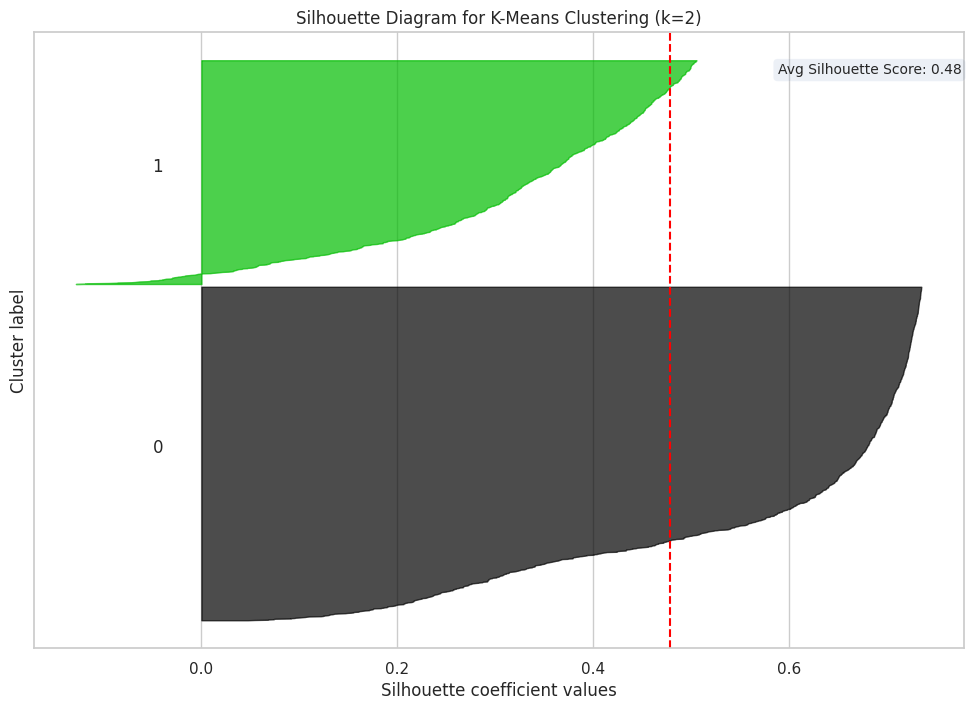

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


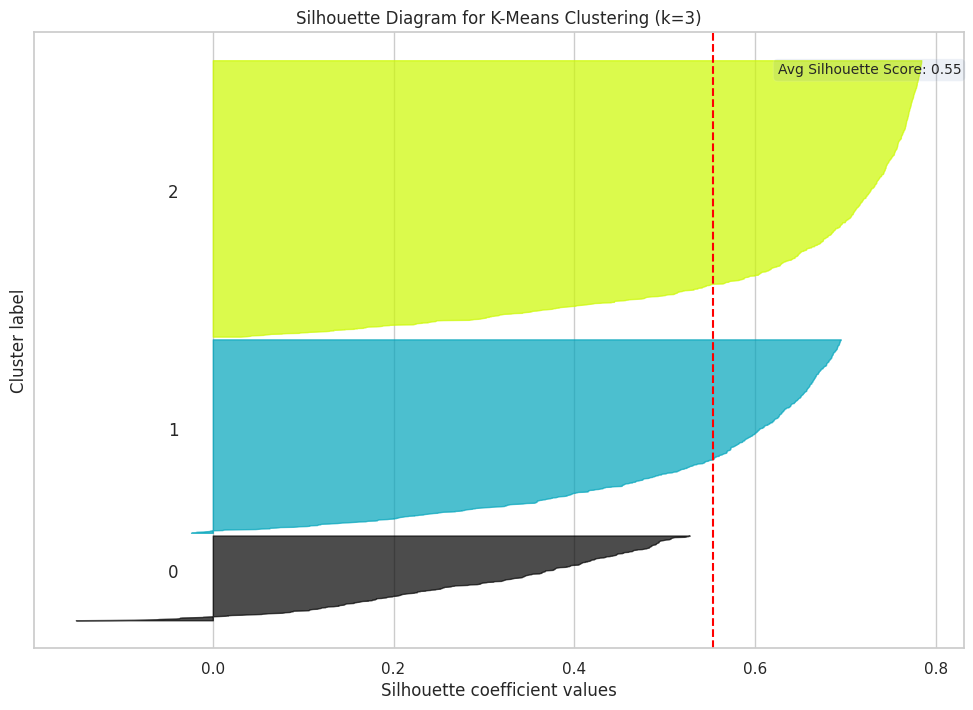

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


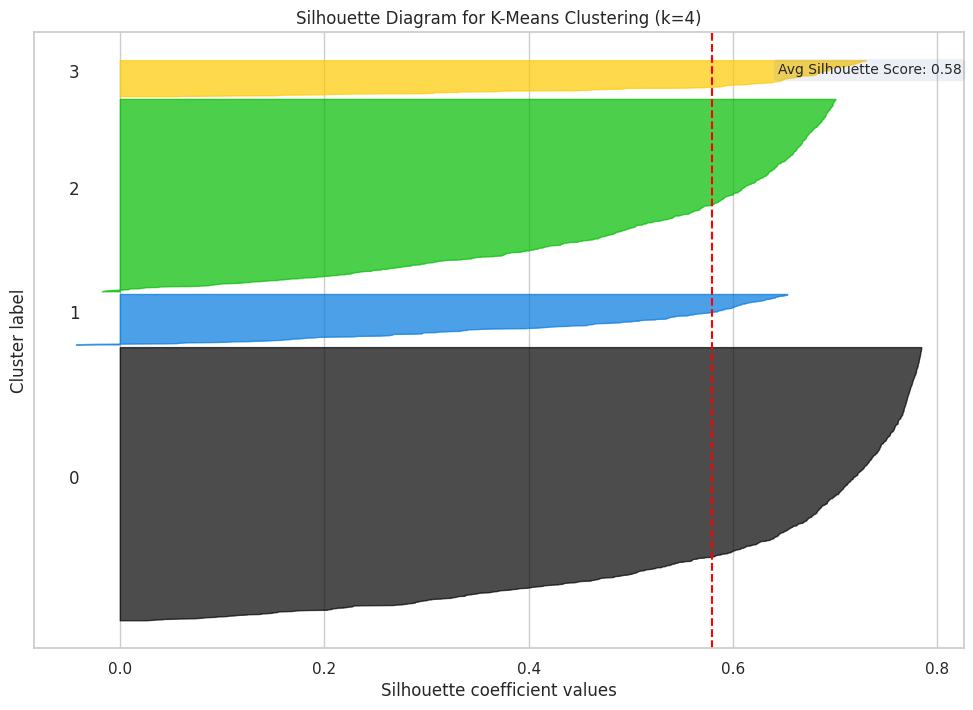

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


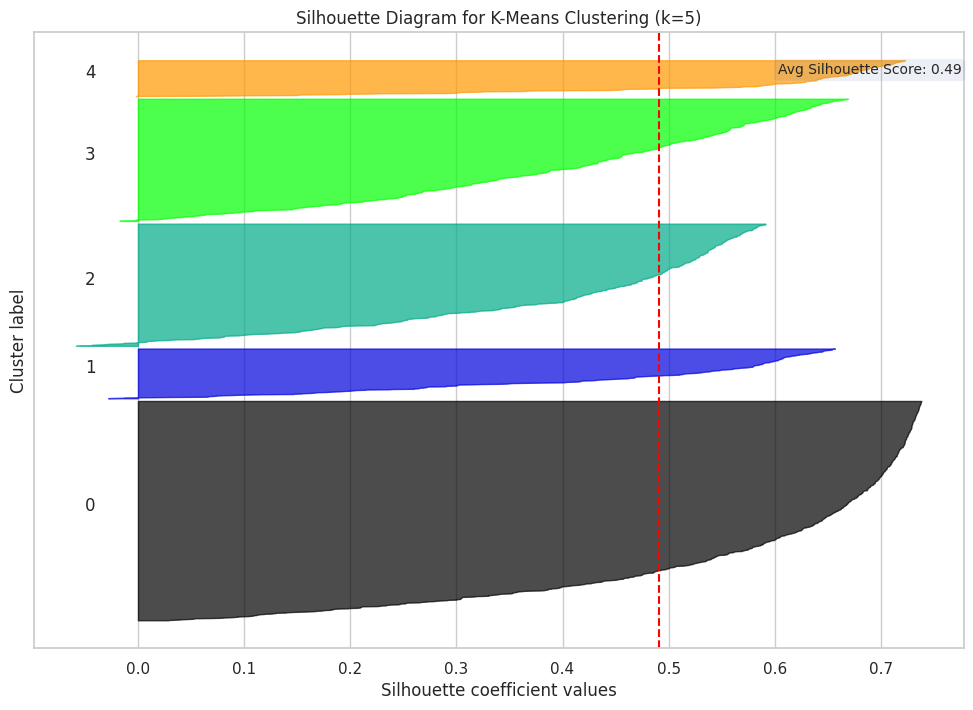

In [17]:
# Specify the range of clusters
range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Apply K-means clustering
    kmeans_model = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans_model.fit_predict(pca_data)

    # Calculate silhouette score for each sample
    silhouette_values = silhouette_samples(pca_data, cluster_labels)

    # Calculate the overall silhouette score
    avg_silhouette_score = silhouette_score(pca_data, cluster_labels)

    # Plot Silhouette Diagram
    plt.figure(figsize=(12, 8))
    y_lower = 10  # Starting point for the first cluster

    for i in range(n_clusters):
        ith_cluster_silhouette_values = silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("Silhouette Diagram for K-Means Clustering (k={})".format(n_clusters))
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")
    plt.axvline(x=avg_silhouette_score, color="red", linestyle="--")

    # Add average silhouette score to the plot
    plt.text(0.8, 0.95, "Avg Silhouette Score: {:.2f}".format(avg_silhouette_score),
             transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round", alpha=0.1))

    plt.yticks([])  # Clear the y-axis labels
    plt.show()


**Q**: In our human eye, it's looks like we need 5 clusters. But both methods return 2. Why do you think kmeans returning 2 and not 5?

**A**:


## 5. K-means Clustering Exercise (15 points)
Manually divide a given set of points into clusters using the K-means clustering.

You are given the following two-dimensional points: <br>
*   A:(2,2)
*   B:(2,6)
*   C:(3,7)
*   D:(5,5)
*   E:(6,2)
*   F:(7,4)
*   G:(8,7)

**Tasks:**
1.   **Visualize the Data**: Plot these points and label each point for easy identification (3 points).
2.   **Choose Initial Cluster Centers**: Arbitrarily select three points as initial cluster centers (For example, you might choose points A and D) and **Answer the questions** (12 points).











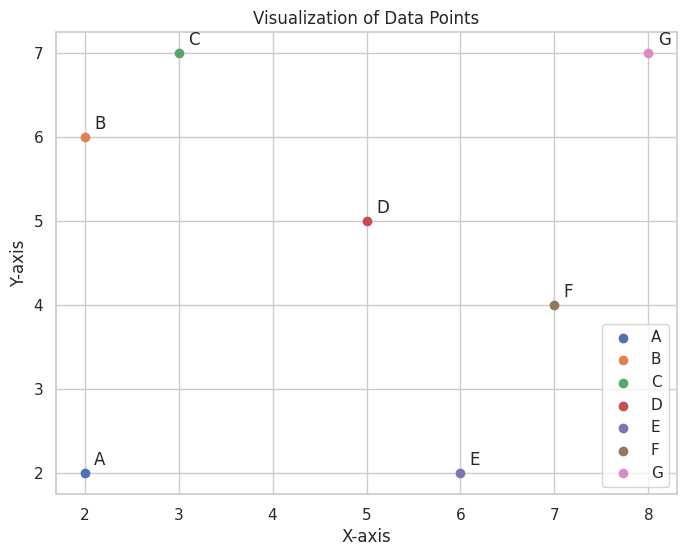

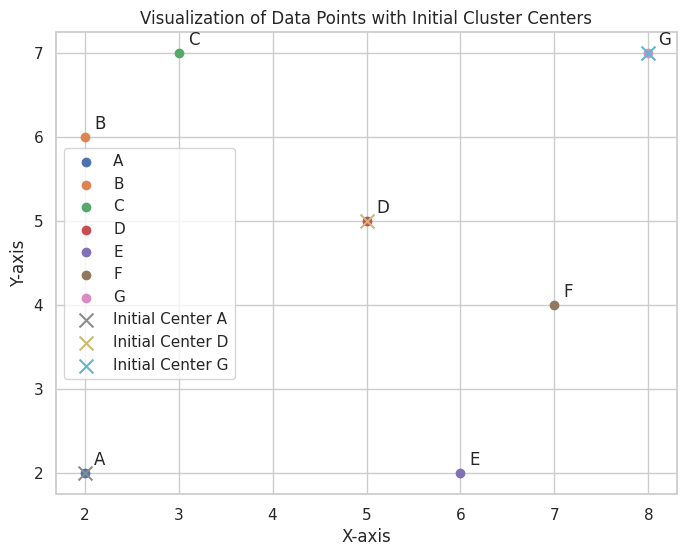

In [18]:
# Given points
points = {'A': (2, 2), 'B': (2, 6), 'C': (3, 7), 'D': (5, 5), 'E': (6, 2), 'F': (7, 4), 'G': (8, 7)}

# Plot the points
plt.figure(figsize=(8, 6))
for point, coordinates in points.items():
    plt.scatter(*coordinates, label=point)

# Label the points for easy identification
for point, coordinates in points.items():
    plt.text(coordinates[0] + 0.1, coordinates[1] + 0.1, point)

plt.title('Visualization of Data Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

# Initial cluster centers
initial_centers = {'A': (2, 2), 'D': (5, 5), 'G': (8, 7)}

# Plot the points
plt.figure(figsize=(8, 6))
for point, coordinates in points.items():
    plt.scatter(*coordinates, label=point)

# Label the points for easy identification
for point, coordinates in points.items():
    plt.text(coordinates[0] + 0.1, coordinates[1] + 0.1, point)

# Plot the initial cluster centers
for center, coordinates in initial_centers.items():
    plt.scatter(*coordinates, marker='x', s=100, label=f'Initial Center {center}')

plt.title('Visualization of Data Points with Initial Cluster Centers')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

**Questions**:
1.   How did the points group together in the final iteration?
2.   Was choosing different initial cluster centers leading to different final clusters? Why might this happen?
3.   Think of any real-world scenarios where K-means clustering could be useful?






**Answers**:
1.
The final grouping of points depends on the initial cluster centers and the iterative assignment and update steps of the K-means algorithm. The algorithm aims to minimize the sum of squared distances between data points and their assigned cluster centers. The final outcome would be three clusters, each associated with one of the chosen initial cluster centers.

2.
Yes, choosing different initial cluster centers can lead to different final clusters.K-means is sensitive to the initial selection of cluster centers because the algorithm may converge to different local minima depending on the starting points.This might happen because of:a.Local Optima: K-means optimization involves finding a local optimum, and different initializations may lead to different local optima.
b.Randomness: The assignment of points to clusters during the early iterations can be influenced by randomness.

3.
Customer Segmentation: Businesses can use K-means to group customers based on their purchasing behavior, helping in targeted marketing strategies.
Document Classification: In natural language processing, K-means can be used to cluster documents based on their content.
Genetic Analysis: K-means can analyze genetic data to group individuals based on similarities in genetic traits.

## 6. Bonus - Compute projection (5 points)
**Notice:** No code required in this section.

Given the next PCA projection matrix
$\begin{pmatrix}
1 & 1\\
2 & -1
\end{pmatrix}$
And the correspoding egienvalues
$(5, -1)$

Compute the projection to one dimension of the next two vectors:
\begin{pmatrix}
1 & 3
\end{pmatrix}
\begin{pmatrix}
3 & 7
\end{pmatrix}

In [19]:
"""
For the vector (1 3)
[1  1]     *     [1]    = [4]
[2 -1]           [3]      [-1]

For the vector (3 7)
[1  1]     *     [3]    = [10]
[2 -1]           [7]      [-11]
"""

'\nFor the vector (1 3)\n[1  1]     *     [1]    = [4]                              \n[2 -1]           [3]      [-1]\n\nFor the vector (3 7)\n[1  1]     *     [3]    = [10]                              \n[2 -1]           [7]      [-11]\n'